# Basic analysis of OHW2020 Github commits

We start by importing the holy trinity of Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We read in the anaonymised data to a pands dataframe and make a second dataframe of only commits to OHW20 repos

In [2]:
df = pd.read_csv('ohw_anonymised.csv', index_col='datetime', parse_dates=True)
df_ohw20 = df[df.ohw20_repo]
df

,author,message,ohw20_repo
datetime,,,
2020-08-20 15:08:09+00:00,participant-21,Merge pull request #1 from cbirdferrer/patch-1...,False
2020-08-17 16:24:17+00:00,participant-21,deleting old presentation_figs file,True
2020-08-14 20:00:38+00:00,participant-21,adding improvements to interpolate notebook to...,True
2020-08-14 20:00:38+00:00,participant-21,merging changes,True
2020-08-14 20:00:38+00:00,participant-21,merging interpolate notebook,True
...,...,...,...
2020-08-07 15:58:21+00:00,participant-33,change read.md,False
2020-08-06 22:26:24+00:00,participant-33,change new2.md and create new.md,False
2020-08-06 22:25:02+00:00,participant-33,changes in new.md and new2.md,False


### Commits in time

In [3]:
weekly_commits = df.author.groupby(df.index.week).count()
df_hw = df[df.index.week==33]
hw_commits = df_hw.author.groupby(df_hw.index.week).count()

[Text(0.5, 0, 'week of 2020'), Text(0, 0.5, 'Commits by OHW participants')]

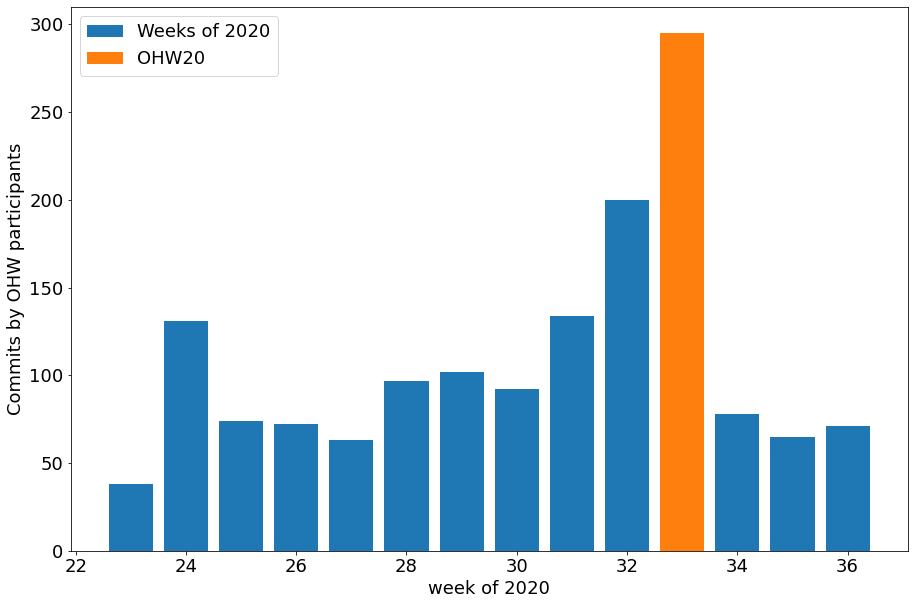

In [4]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(weekly_commits.index, weekly_commits.values, label='Weeks of 2020')
ax.bar(hw_commits.index, hw_commits.values, label='OHW20')
ax.legend()
ax.set(xlabel='week of 2020', ylabel='Commits by OHW participants')

### How about zooming in on hackweek?

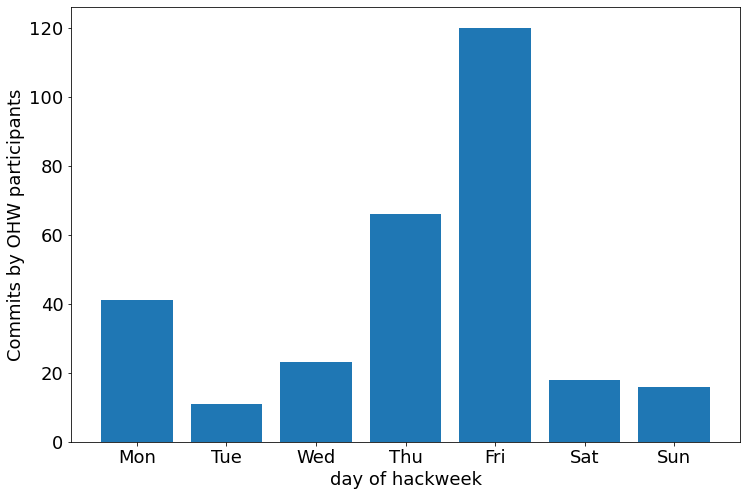

In [5]:
daily_commits = df_hw.author.groupby(df_hw.index.day).count()
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(daily_commits.index, daily_commits.values)
ax.set(xlabel='day of hackweek', ylabel='Commits by OHW participants')
ax.set_xticks(np.arange(10,17))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

### Zoom closer?

[Text(0.5, 0, 'Hour of Friday (UTC)'),
 Text(0, 0.5, 'Commits by OHW participants')]

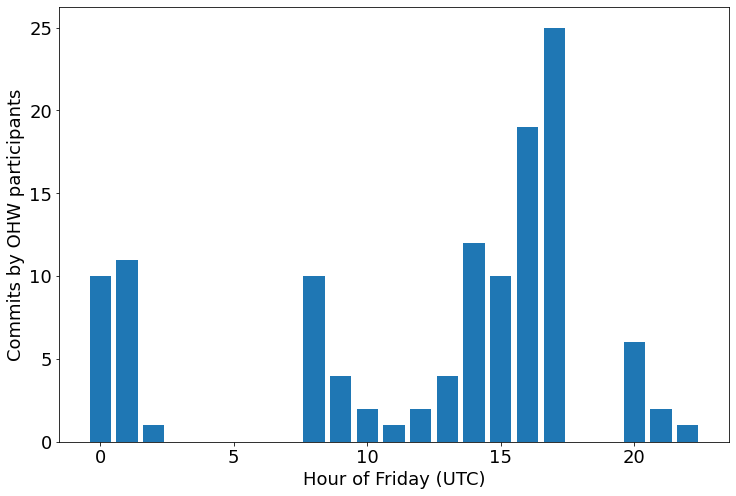

In [6]:
df_friday = df_hw[df_hw.index.day==14]

friday_commits = df_friday.author.groupby(df_friday.index.hour).count()
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(friday_commits.index, friday_commits.values)
ax.set(xlabel='Hour of Friday (UTC)', ylabel='Commits by OHW participants')


Hopefuly an indication of Oceanhackweek's [global participation](https://twitter.com/SeascapeScience/status/1295708658664443904), not some sorely sleep deprived coders!

### How many unique participants wrote commits during these weeks?

In [12]:
# severley unpythonic but it works
week_commits = []
unique_users = []
for week in weekly_commits.index:
    sub_df = df[df.index.week==week]
    unique_users.append(len(sub_df.groupby('author').count()))

[Text(0.5, 0, 'week of 2020'),
 Text(0, 0.5, 'Unique OHW20 participants with commits')]

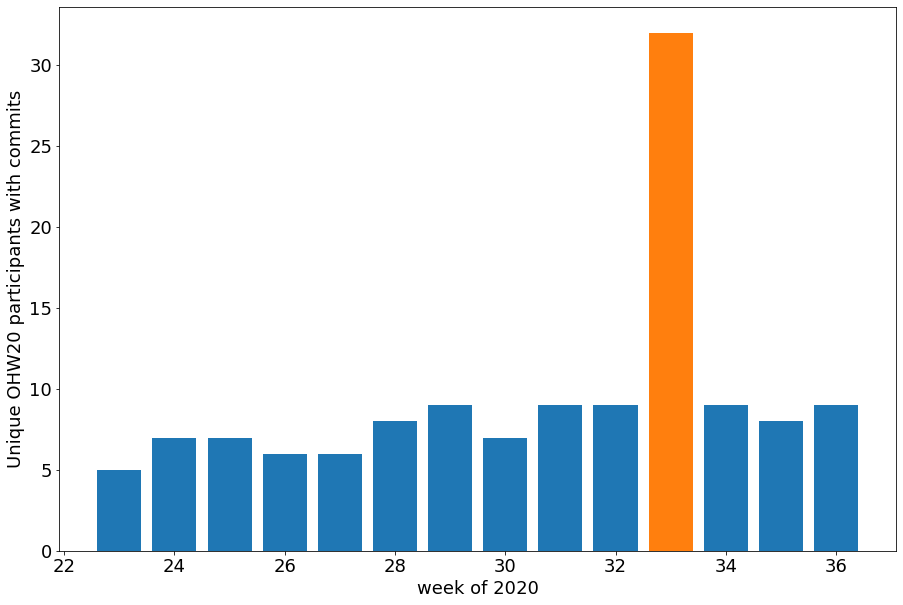

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(weekly_commits.index, unique_users)
ax.bar(33, max(unique_users))
ax.set(xlabel='week of 2020', ylabel='Unique OHW20 participants with commits')

### What is the distribution of commits amongst participants like?

In [10]:
from collections import Counter
c = Counter(df_ohw20[df_ohw20.ohw20_repo].author)
MVP = c.most_common()
mvp_names, mvp_nums = [], []
for tup in MVP:
    mvp_names.append(tup[0])
    mvp_nums.append(tup[1])

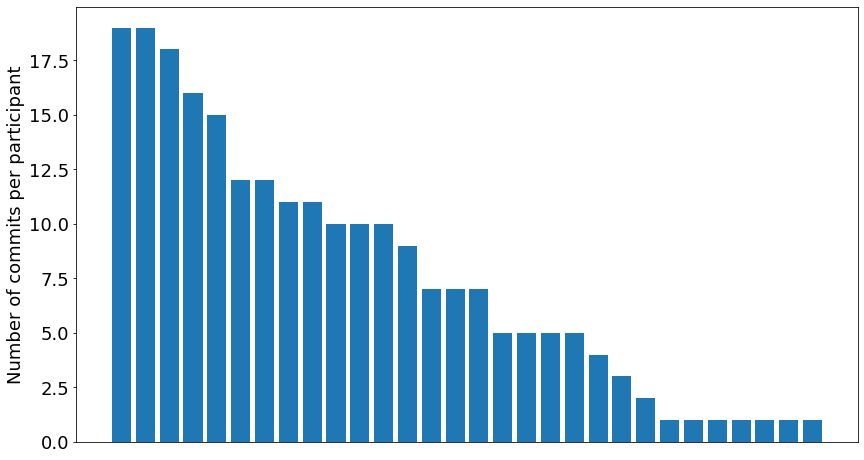

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(mvp_names, mvp_nums)
ax.set(xticks=[], ylabel='Number of commits per participant');

### That's it! (for now)

I have only scratched the surface of the data you can get from scraping github here. For more ideas on what to do with this data, check out the end of the other notebook